# Recommendation system on Amazon Dataset.

In [1]:
import os
os.chdir('E:\Datasets\Amazon Recommendation engine')

Lets Import all important libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Lets import dataset
df=pd.read_csv('Amazon_Movies_and_TV_Ratings.csv')

In [4]:
#Visualize head of dataframe
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(4848, 207)

## DESCRIPTION

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

## Data Dictionary
* UserID : 4848 customers who provided a rating for each movie
* Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

## Data Considerations
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

##### Lets replace all NA with 0. 

In [6]:
df.fillna(0,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [8]:
df.isna().sum().value_counts()

0    207
dtype: int64

Now there is no NA value or missing value in our datset.

### Exploratary Data Analysis

###### Lets find out Which movies have maximum views/ratings?

In [9]:
b=[]
for i in df.columns:
    if i !='user_id':
        a=(df[i] !=0).sum()
        b.append(a)
np.transpose(b)
Movies_Total_ratings_df=pd.DataFrame(b,index=df.columns[1:])

In [10]:

Sorted_Movies=Movies_Total_ratings_df.sort_values(by=0,ascending=False)
Sorted_Movies.head(10).index

Index(['Movie127', 'Movie140', 'Movie16', 'Movie103', 'Movie29', 'Movie91',
       'Movie92', 'Movie89', 'Movie158', 'Movie108'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


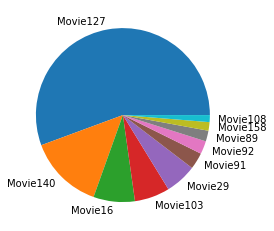

In [11]:
plt.pie(Sorted_Movies.head(10),labels=Sorted_Movies.head(10).index)
plt.show()

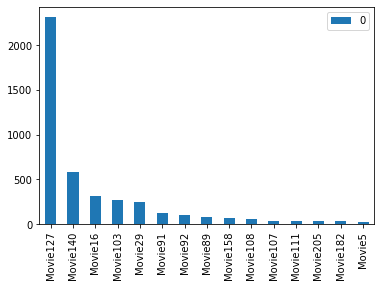

In [12]:
Sorted_Movies.head(15).plot(kind='bar')
plt.show()

It is Clear from above pie chart that Movie127 is watched by maximum People.


###### From above we can also Define the top 5 movies with the least audience.

In [13]:
Sorted_Movies.tail(5).index

Index(['Movie54', 'Movie116', 'Movie115', 'Movie55', 'Movie1'], dtype='object')

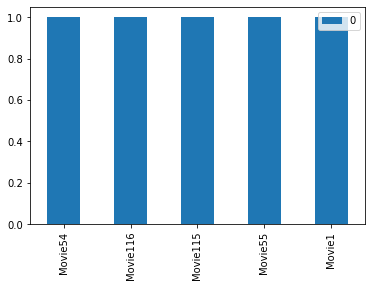

In [14]:
Sorted_Movies.tail(5).plot(kind='bar')
plt.show()

['Movie54', 'Movie116', 'Movie115', 'Movie55', 'Movie1'] is watched by only single each.

###### Now let see what is the average rating for each movie? And Define the top 5 movies with the maximum ratings.

In [15]:
df1=df.drop('user_id',axis=1)

In [16]:

Average_df=pd.DataFrame(df1.mean(),index=df1.columns)


In [17]:
Sorted_Averge=Average_df.sort_values(by=0,ascending=False)

In [18]:
Sorted_Averge.head(10)

,0
Movie127,1.961840
Movie140,0.576320
Movie16,0.298267
Movie103,0.255982
Movie29,0.240924
Movie91,0.120875
Movie92,0.099422
Movie89,0.078383
Movie158,0.065594
Movie108,0.051980


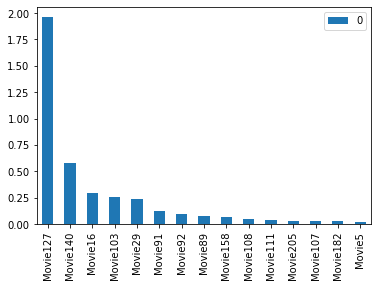

In [19]:
Sorted_Averge.head(15).plot(kind='bar')
plt.show()

In [20]:

print('Top 5 Movies are below')
print(Sorted_Averge.head(5).index)

Top 5 Movies are below
Index(['Movie127', 'Movie140', 'Movie16', 'Movie103', 'Movie29'], dtype='object')


### Lets divide the data into training and test data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(df,random_state=0,test_size=0.25)

In [22]:
#Converting Our dataset into matrix to find Cosine Similarity distance 
matrix=df1.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [23]:
matrix.shape

(4848, 206)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity=cosine_similarity(matrix)

**user_similarity matrix is a cosine similarity matrix showing similarity between users**

In [25]:
user_similarity.shape

(4848, 4848)

In [26]:
movie_similarity=cosine_similarity(matrix.T)

**movie_similarity matrix is a cosine similarity matrix showing similarity between movies**

In [27]:
movie_similarity.shape


(206, 206)

In [28]:
print(movie_similarity)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Converting both user_similarity and movie_similarity matrix into dataframe for finding some output. To find similarity between movies and user.

In [29]:
movies_similarity=pd.DataFrame(movie_similarity,index=df1.columns,columns=df1.columns)

In [30]:
movies_similarity.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
Movie1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
user_similarity=pd.DataFrame(user_similarity,index=df.user_id,columns=df.user_id)

In [34]:
user_similarity.head()

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH3QC2PC1VTGP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LKP6WPMP9UKX,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIY68KEPQ5ZD,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
user_similarity['A102Z4PIK7CYD8'].value_counts()

0.000000    4846
0.707107       1
1.000000       1
Name: A102Z4PIK7CYD8, dtype: int64


Iterpretation : ***From above we can conclude that user 'A102Z4PIK7CYD8' has high similarity of 70% with only 1 user.***
    